In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
file_path = '/content/gdrive/My Drive/Level2_BAH_RecyclingDiversion/Data_Level2_BAH_RecyclingDiversion.xlsx'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
from datetime import datetime
df = pd.read_excel(file_path)
df["dt"] = [datetime(FiscalYear,FiscalMonth,1) for (FiscalMonth,FiscalYear) in zip(df["FiscalMonth"],df["FiscalYear"])]

In [0]:
df_data = df.loc[:,["Zone","dt","CaptureTotal"]]#.groupby(["dt"])
df_data.set_index("dt")
df_data.head()

,Zone,dt,CaptureTotal
0,Brooklyn North,2019-10-01,44.146764
1,Brooklyn North,2019-10-01,41.213700
2,Brooklyn North,2019-10-01,38.155937
3,Brooklyn North,2019-10-01,48.750755
4,Brooklyn North,2019-10-01,31.530129


In [0]:
data_for_np = pd.get_dummies(df_data,prefix=['Zone'])
data_for_np.head()

,dt,CaptureTotal,Zone_Bronx,Zone_Brooklyn North,Zone_Brooklyn South,Zone_Manhattan,Zone_Queens East,Zone_Queens West,Zone_Staten Island
0,2019-10-01,44.146764,0,1,0,0,0,0,0
1,2019-10-01,41.213700,0,1,0,0,0,0,0
2,2019-10-01,38.155937,0,1,0,0,0,0,0
3,2019-10-01,48.750755,0,1,0,0,0,0,0
4,2019-10-01,31.530129,0,1,0,0,0,0,0


In [0]:
import numpy as np
data = np.array(data_for_np)

In [0]:
print(data[2124:])

[[Timestamp('2019-01-01 00:00:00') 21.6898816044264 1 ... 0 0 0]
 [Timestamp('2019-01-01 00:00:00') 29.0587095974487 1 ... 0 0 0]
 [Timestamp('2019-01-01 00:00:00') 25.9831373795289 0 ... 0 0 0]
 ...
 [Timestamp('2019-12-01 00:00:00') 54.3270163223542 0 ... 0 0 0]
 [Timestamp('2019-12-01 00:00:00') 55.0768393837618 0 ... 0 0 0]
 [Timestamp('2019-12-01 00:00:00') 58.0993654120746 0 ... 0 0 0]]


In [0]:
str(data[0,0])=='2016-01-01 00:00:00'

False

In [0]:
for i,row in enumerate(data) :
  if '2019' in str(row[0]):
    print(i) 
    break

0


In [0]:
X_train = data[:2124]
y_train = np.array([X_train[i][1] for i in range(len(X_train))])
print(y_train.shape)

(2124,)


In [0]:
#x_train = np.array([[X_train[i][0],X_train[i][2:]] for i in range(len(X_train))])
#x_train = X_train[]
print(X_train[0])

[Timestamp('2016-01-01 00:00:00') 19.0231517785822 1 0 0 0 0 0 0]


In [0]:
import math

def KNN(query,X_train,Y_train,neighbours = 5):
  dist = []
  for i,row in enumerate(X_train):
    values = []
    #print('data value of row :{}'.format(i))
    for j in range(len(row)):
      if j==0:
        days = int(str(query[0]-row[0]).split(' ')[0])/1430
        values.append(days)
        continue
      elif j == 1:
        continue
      else :
        value = query[j] - row[j]
        values.append(value)
    dist.append(np.append(X_train[i], np.linalg.norm(values))) 
  dist = np.array(dist)  
  dist_sort = dist[np.argsort(dist[:,-1])[::-1]]
  #print(dist)
  output = np.mean(dist_sort[:neighbours,1])
  #print(output)
  return output

# print(X_train[0:6])
# out = KNN(X_train[-1],X_train[0:6],y_train[0])
# print(out)

In [0]:
y_pred_n1 =  [KNN(x_test[i],X_train,y_train,1) for i in range(len(x_test))]

In [0]:
x_test = data[2124:]
y_test = x_test[:,1]

y_pred =  [KNN(x_test[i],X_train,y_train) for i in range(len(x_test))]
print(y_pred)

[52.68539947651025, 52.68539947651025, 52.68539947651025, 52.68539947651025, 52.68539947651025, 52.68539947651025, 52.68539947651025, 52.68539947651025, 52.68539947651025, 52.34089449385323, 52.34089449385323, 52.34089449385323, 52.34089449385323, 52.34089449385323, 52.34089449385323, 52.34089449385323, 52.34089449385323, 52.34089449385323, 48.042530044353555, 48.042530044353555, 48.042530044353555, 48.042530044353555, 48.042530044353555, 48.042530044353555, 48.042530044353555, 48.042530044353555, 48.042530044353555, 48.042530044353555, 48.042530044353555, 48.042530044353555, 46.16422215507304, 46.16422215507304, 46.16422215507304, 46.16422215507304, 46.16422215507304, 46.16422215507304, 46.16422215507304, 46.16422215507304, 46.16422215507304, 46.16422215507304, 46.16422215507304, 46.16422215507304, 52.499636537217654, 52.499636537217654, 52.499636537217654, 52.499636537217654, 52.499636537217654, 52.499636537217654, 52.499636537217654, 52.499636537217654, 52.499636537217654, 52.499636

In [0]:
y_pred = np.array(y_pred)
y_test = x_test[:,1]
print(y_pred.shape)
print(y_test.shape)

(708,)
(708,)


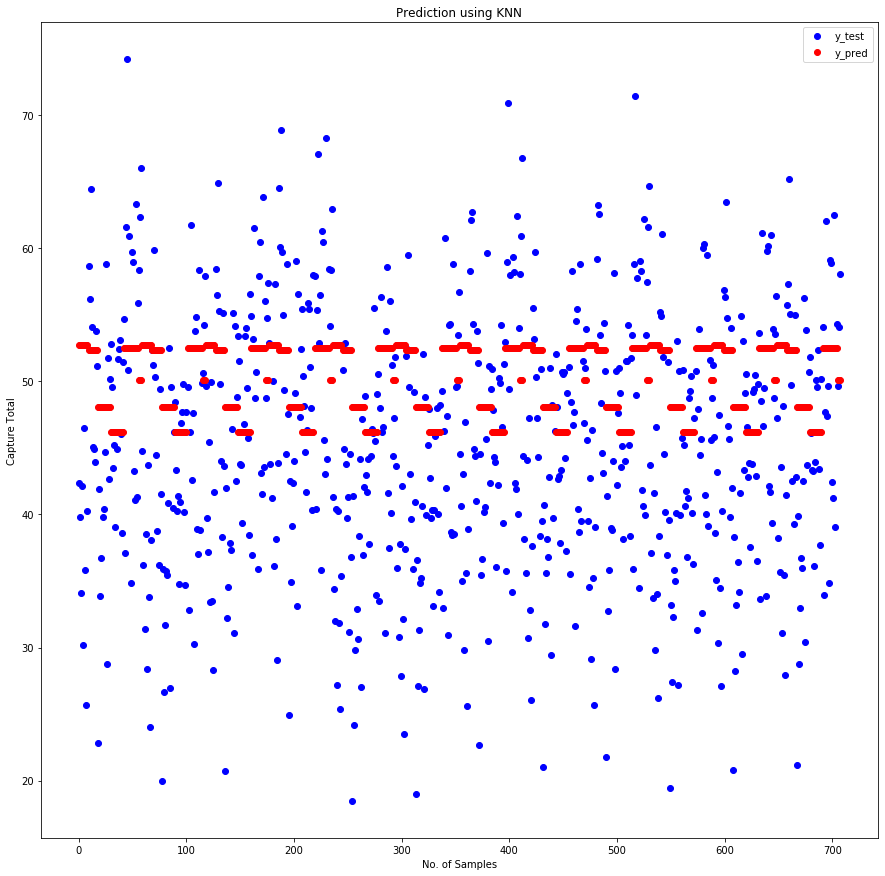

In [21]:
import matplotlib.pyplot as plt
x = np.arange(len(y_pred))
plt.figure(figsize= (15,15))
plt.plot(x,y_test,'bo',label = 'Y_test')
plt.plot(x,y_pred,'ro',label = 'y_pred')
plt.legend(('y_test','y_pred'))
plt.xlabel('No. of Samples')
plt.ylabel('Capture Total')
plt.title('Prediction using KNN')
plt.show()

In [0]:
Accuracy = (y_test == y_pred)
count = 0
for t in range(len(Accuracy)):
  if Accuracy[i]:
    count += 1

final_accuracy = count/len(Accuracy)
print(count)
print(final_accuracy)

0
0.0


In [0]:
import sklearn.metrics

sklearn.metrics.mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)

123.29775269009595